In [8]:
import main

## Loading the images

In [18]:
# We create a list to store the folder and the filenames and another list to store the arrays corresponding to each image
images_names, images_array = main.load_images("data")
filenames = []
for img in images_names:
    filenames.append(img.split('/')[-1])
print('Some of the filenames are:', filenames[:5])

Some of the filenames are: ['ISIC_0011404.jpg', 'ISIC_0011405.jpg', 'ISIC_0011428.jpg', 'ISIC_0011429.jpg', 'ISIC_0011430.jpg']


Now, we compute the histogram for each image and save it in a variable

In [ ]:
images_histograms = main.data_base_histogram(images_array)

## Calculation of euclidean distances:

In [20]:
# Now, we calculate the distances between a query image and the rest of the images,
# and save the all the distances in a variable
histogram_distances = main.compare_histograms(images_histograms[20], images_histograms)

We create a list to store all the distances with its corresponding filenames, and order them from small to large

In [31]:
min_list = sorted(zip(filenames,histogram_distances), key=lambda t: t[1])
#print the 6 first images with the smallest distances, being the first the same image, so its distance is 0
print(min_list[0:5])

[('ISIC_0012089.jpg', array([0.])), ('ISIC_0012172.jpg', array([0.30669357])), ('ISIC_0012204.jpg', array([0.34009183])), ('ISIC_0012116.jpg', array([0.35732786])), ('ISIC_0012127.jpg', array([0.35895788]))]


##### Now, let's display the images

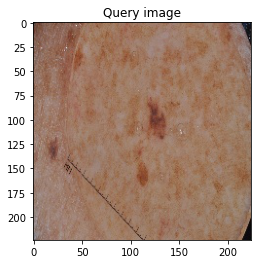

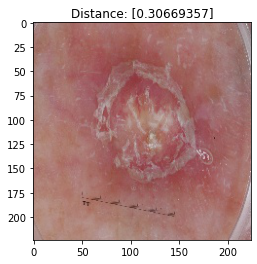

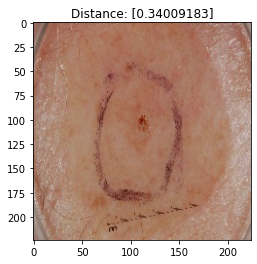

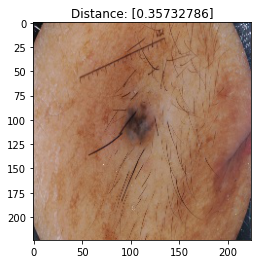

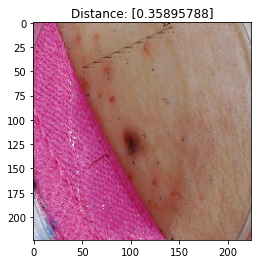

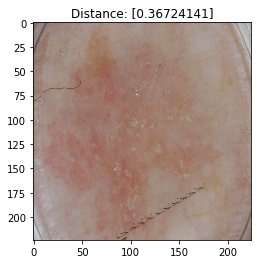

In [62]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(len(min_list[0:6])):
    img_query = mpimg.imread('data/'+ min_list[i][0])

    imgplot = plt.imshow(img_query)
    if i == 0:
        plt.title('Query image')
    else:
        plt.title('Distance: ' + str(min_list[i][1]))
    plt.show()

# GABOR filter

First, we generate the necessary kernels to compute the gabor filter.
By default, the parameters are set to:
* n_theta = 4
* sigmas = (1,3)
* frequencies = (0.05, 0.25)

In [64]:
gabor_kernels = main.create_kernels()

Now, we compute the feature vector of textures for each image

In [66]:
gabor_feats = main.compute_feats(images_names, gabor_kernels)

## Calculation of Canberra distances:

In [67]:
gabor_distances = main.compare_gabor(gabor_feats[20], gabor_feats)

In [68]:
min_list_gabor = sorted(zip(filenames,gabor_distances), key=lambda t: t[1])
#print the 6 first images with the smallest distances, being the first the same image, so its distance is 0
print(min_list_gabor[0:5])

[('ISIC_0012089.jpg', array([0.])), ('ISIC_0012155.jpg', array([0.16148588])), ('ISIC_0012143.jpg', array([0.18224172])), ('ISIC_0012134.jpg', array([0.21011035])), ('ISIC_0012178.jpg', array([0.21902589]))]


##### Now, let's display the images

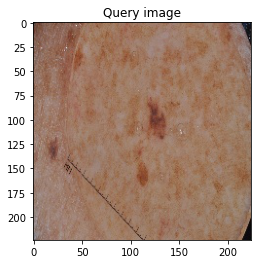

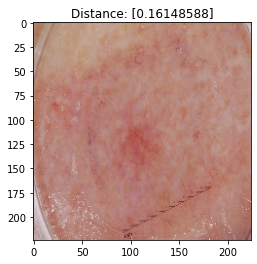

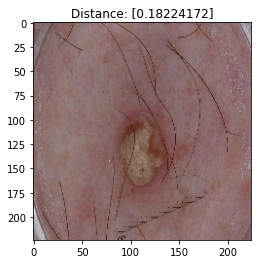

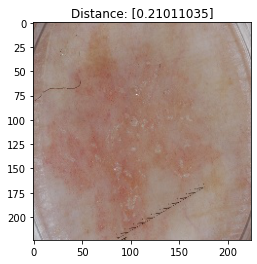

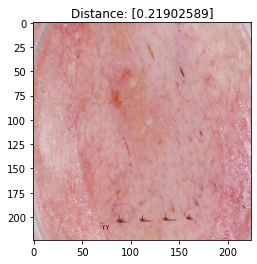

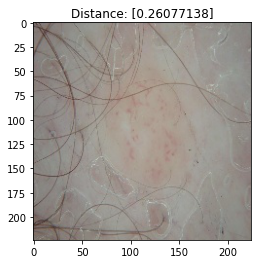

In [69]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(len(min_list_gabor[0:6])):
    img_query = mpimg.imread('data/'+ min_list_gabor[i][0])

    imgplot = plt.imshow(img_query)
    if i == 0:
        plt.title('Query image')
    else:
        plt.title('Distance: ' + str(min_list_gabor[i][1]))
    plt.show()

# Combining distances

Now, we combine both distances with a linear combination in order to have a more powerful CBIR tool

In [70]:
similar_images = main.combine_distances(histogram_distances, gabor_distances, images_names)

##### Now, let's display the images

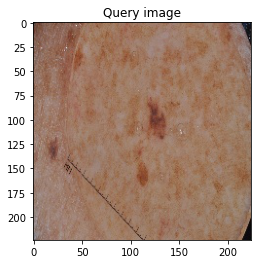

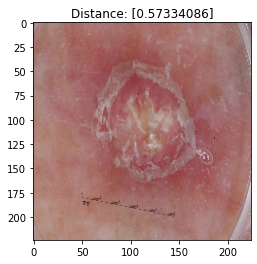

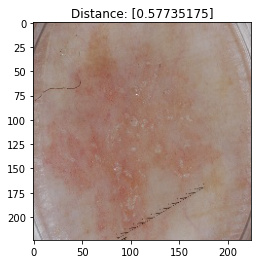

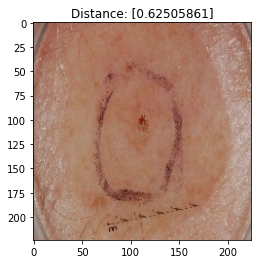

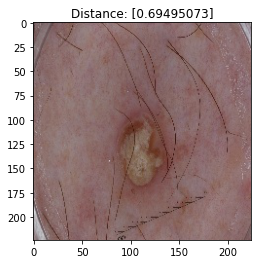

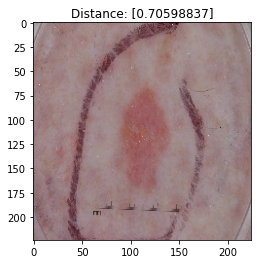

In [75]:
for i in range(len(similar_images[0:6])):
    img = mpimg.imread(similar_images[i][0])
    plt.imshow(img)
    if i == 0:
        plt.title('Query image')
    else:
        plt.title('Distance: ' + str(similar_images[i][1]))
    plt.show()